In [1]:
import numpy as np
import pandas as pd
from astropy.io import ascii
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.table import Table
import os
import matplotlib.pyplot as plt

%run -i /Users/marie/Documents/Research/dataproc/tools/decont.py

## Using Francisco's code for decontamination in the first Population

In [2]:
clu1 = Table.read('Catalogues/NGC5822_8_Pop1.csv', format='csv')
# = pd.read_csv('Catalogues/NGC2539_8_Pop1.csv')
clu1

RA_ICRS,DE_ICRS,Source,Plx,pmRA,pmDE,Solved,nueff,pscol,RUWE,Gmag,BPmag,RPmag,BP-RP,RV,ELAT,RAJ2000,DEJ2000,Plx_corr
float64,float64,int64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
225.44210759065,-55.14898983609,5881604188883544576,1.2438,-7.67,-5.493,31,1.535,--,0.917,14.326471,14.695655,13.779744,0.915911,-18.57,-36.2249594384,225.44216724749,-55.1489654231,1.284711
225.68635142729,-55.0316504232,5881612190342982784,1.1881,-7.819,-5.619,31,1.604,--,0.9,12.566382,12.794354,12.190967,0.603388,--,-36.06661416981,225.68641206091,-55.03162545022,1.217252
225.36683899998,-55.06826543484,5881617108146265088,1.1905,-7.601,-5.641,31,1.543,--,0.991,14.009442,14.363049,13.482981,0.880068,-39.67,-36.16412270512,225.36689799947,-55.06824036189,1.2313059999999998
225.54860932793,-55.04357006619,5881622532624231936,1.174,-7.527,-5.648,31,1.585,--,0.923,12.961983,13.230419,12.532622,0.697797,-30.59,-36.10497950227,225.54866771409,-55.04354496365,1.205017
225.60557069552,-54.86111748521,5881626007319228160,1.2198,-7.673,-5.63,31,1.532,--,0.883,14.197813,14.571778,13.651608,0.920171,-25.21,-35.92241687923,225.60562994507,-54.86109246182,1.260643
225.31692222218,-54.97593078739,5881626625794417920,1.2111,-7.648,-5.635,31,1.534,--,0.906,14.275715,14.645865,13.733151,0.912714,-31.89,-36.08740094267,225.31698144479,-54.97590574491,1.2519900000000002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225.18334682432,-54.13994797612,5899718677289215488,1.1799,-7.727,-5.25,31,1.605,--,0.953,10.25226,10.475113,9.872563,0.60255,-27.93,-35.32942258394,225.18340544846,-54.13992464343,1.202323
224.83583426282,-54.17388998988,5899721048111220224,1.2303,-7.654,-5.378,31,1.576,--,0.957,13.183517,13.468952,12.732883,0.73607,-35.7,-35.43147036801,224.83589238134,-54.17386608795,1.27115


In [5]:
input_file = 'Catalogues/NGC5822_8_Pop1.csv'
features = ['Gmag','BPmag-RPmag',"pmRA","pmDE"]
coordinates = ['RA_ICRS','DE_ICRS']
table = Table.read(input_file)
table = field_select(table,
                     cluster_center=(226.0510, -54.3660),
                     limiting_radii=[0, 0.6],
                     field_radii=[0.6],
                     coord_columns= coordinates,
                     footprint_geometry= "circle")

table = pert2d(table, features=features, cells=[1.5,0.75, 0.2, 0.2])


         data            area
cluster  (418, 4)        1.13097
field    (75, 4)        3.59939
 
feature     min     max     std    cell    ncells
Gmag         9.04   20.72   1.82   1.50      8
BPmag-RPmag        0.40    1.57   0.29   0.75      2
pmRA        -7.94   -6.99   0.16   0.20      5
pmDE        -5.94   -5.05   0.16   0.20      5


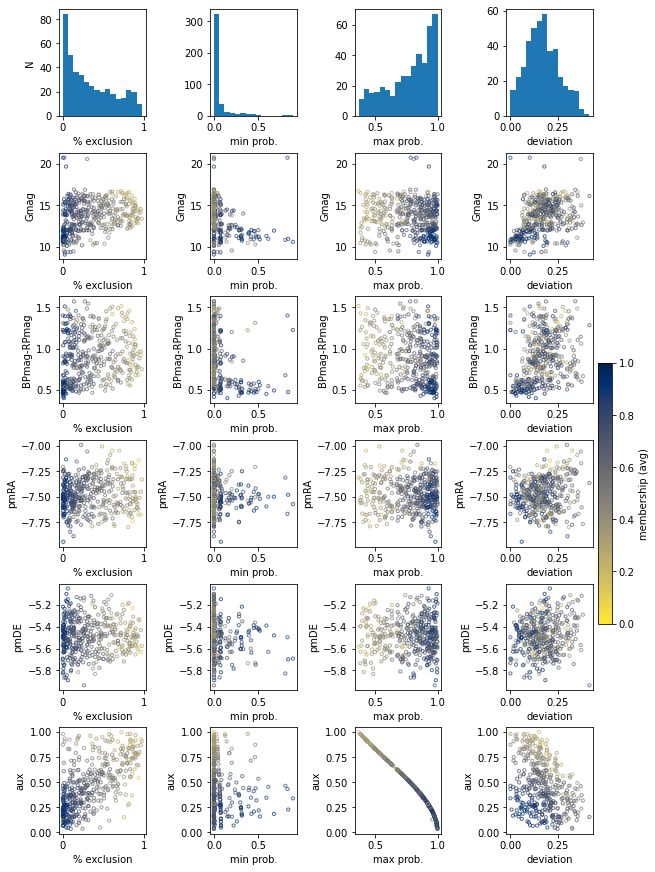

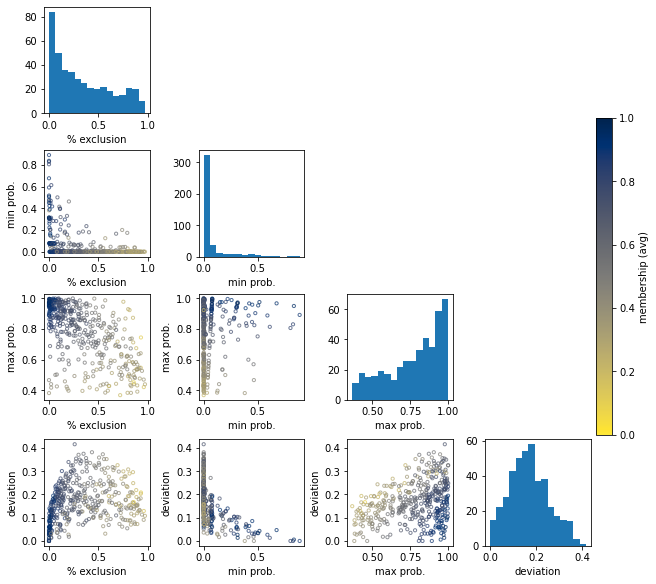

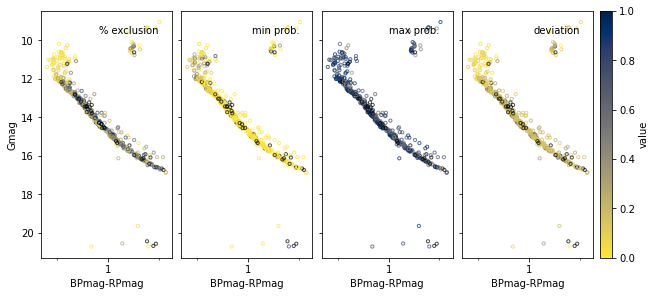

In [6]:
columns = ['excl','min','max','std']
labels = ['% exclusion', 'min prob.', 'max prob.', 'deviation']
plot_membership(table, columns, features+['aux'],
                labels=labels, color='avg', output='pert2d_ngc6242.pdf')

289


(<Figure size 700x300 with 4 Axes>,
 array([<Axes: xlabel='BPmag-RPmag', ylabel='Gmag'>,
        <Axes: xlabel='BPmag-RPmag'>, <Axes: xlabel='BPmag-RPmag'>],
       dtype=object))

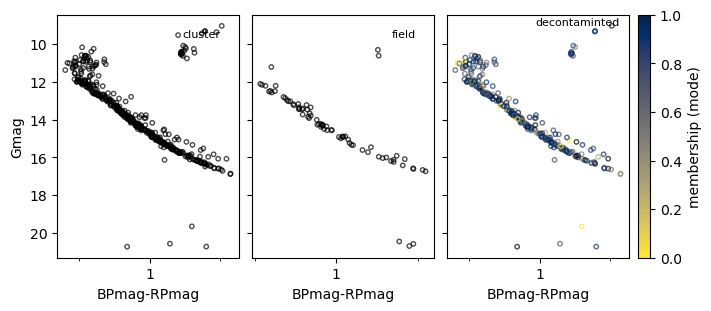

In [8]:
member = (table['excl'] <= 1) & (table['max'] > 0.7) & (table['std'] < 0.4)
print(np.sum(member))
plot_memb_cmd(table, ['Gmag','BPmag-RPmag'])

In [9]:
data1 = table[member]

In [10]:
#data1.write('Catalogues/NGC5822_10_Pop1.csv', format='csv', overwrite=True)

## Using Francisco's code for decontamination in the second Population

In [11]:
clu2 = Table.read('Catalogues/NGC5822_9_Pop2.csv', format='csv')
# = pd.read_csv('Catalogues/NGC2539_9_Pop2.csv')
clu2

RA_ICRS,DE_ICRS,Source,Plx,pmRA,pmDE,Solved,nueff,pscol,RUWE,Gmag,BPmag,RPmag,BP-RP,RV,ELAT,RAJ2000,DEJ2000,Plx_corr
float64,float64,int64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
226.5408154118,-56.31726853485,5880538895205342848,1.2212,-7.561,-3.855,95,--,1.2681,1.02,20.414282,21.562517,19.130104,2.432413,--,-37.10857430465,226.54087600359,-56.31725140085,1.178051
226.48601362671,-56.25964580027,5880539999013530240,1.3248,-6.493,-4.649,95,--,1.2593,1.095,20.303038,21.424482,18.701237,2.723246,--,-37.06488784647,226.48606558083,-56.25962513676,1.279951
227.29151471469,-56.20328603066,5880553017058278656,1.2268,-6.955,-4.249,95,--,1.3698,1.04,19.986824,21.398617,18.599062,2.799555,--,-36.85956473972,227.29157028226,-56.20326714769,1.212646
227.33648515484,-56.1707723273,5880553193167640576,1.2236,-6.473,-6.232,31,1.537,--,1.06,13.967035,14.326902,13.421547,0.905355,-21.07,-36.8205197492,227.33653683046,-56.17074463015,1.264165
227.17105299504,-56.25455548051,5880553983435241088,1.3605,-6.446,-4.474,95,--,1.2908,1.153,20.55247,22.385824,19.490551,2.895273,--,-36.93043744285,227.1711045679,-56.25453559493,1.324254
227.03947243836,-56.28319935857,5880554327032787072,1.3027,-6.993,-3.877,95,--,1.5158,0.994,20.437778,21.66767,19.256254,2.411415,--,-36.98214327781,227.03952843335,-56.28318212911,1.322382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224.06082415548,-53.40510479169,5899999121463455232,1.1981,-5.864,-4.252,31,1.411,--,1.097,20.798286,21.19965,20.967293,0.232357,--,-34.86954294461,224.06086787591,-53.40508589482,1.202792
224.47487870678,-53.17732693373,5900008845269629056,1.1723,-5.714,-5.001,95,--,1.3172,0.968,19.007261,16.983685,16.159115,0.82457,--,-34.57011018147,224.47492107669,-53.17730470807,1.195355


In [14]:
input_file = 'Catalogues/NGC5822_9_Pop2.csv'
features = ['Gmag','BPmag-RPmag',"pmRA","pmDE"]
coordinates = ['RA_ICRS','DE_ICRS']
table = Table.read(input_file)

table = field_select(table,
                     cluster_center=(226.0510, -54.3660),
                     limiting_radii=[0, 0.6],
                     field_radii=[0.6],
                     coord_columns= coordinates,
                     footprint_geometry= "circle")

table = pert2d(table, features=features, cells=[1.5,0.75, 0.2, 0.2])


         data            area
cluster  (235, 4)        1.13097
field    (1484, 4)        11.42028
 
feature     min     max     std    cell    ncells
Gmag         9.72   20.86   0.40   1.50      8
BPmag-RPmag       -0.34    4.23   0.68   0.75      7
pmRA        -9.34   -5.45   0.91   0.20     20
pmDE        -7.44   -3.60   0.64   0.20     20


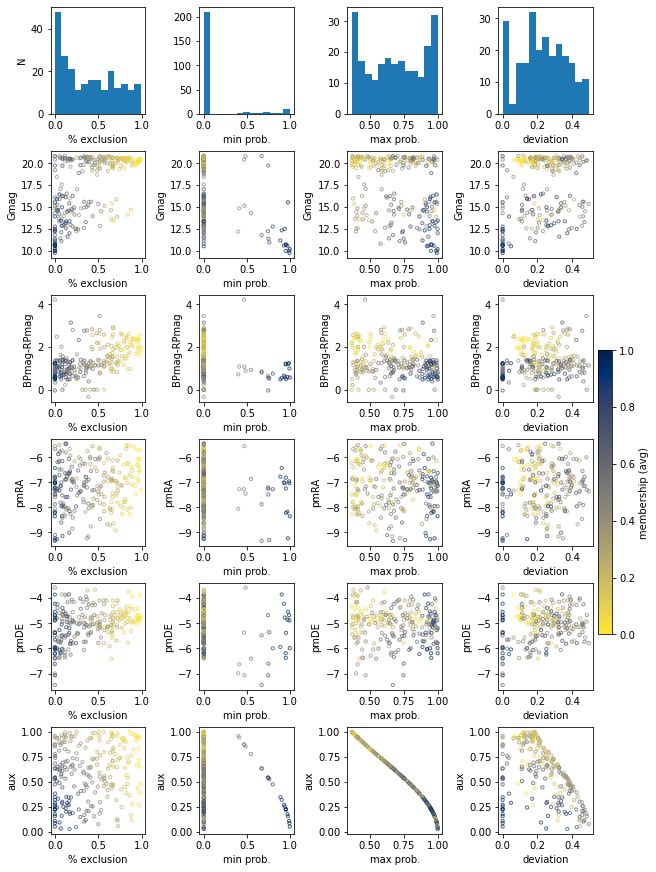

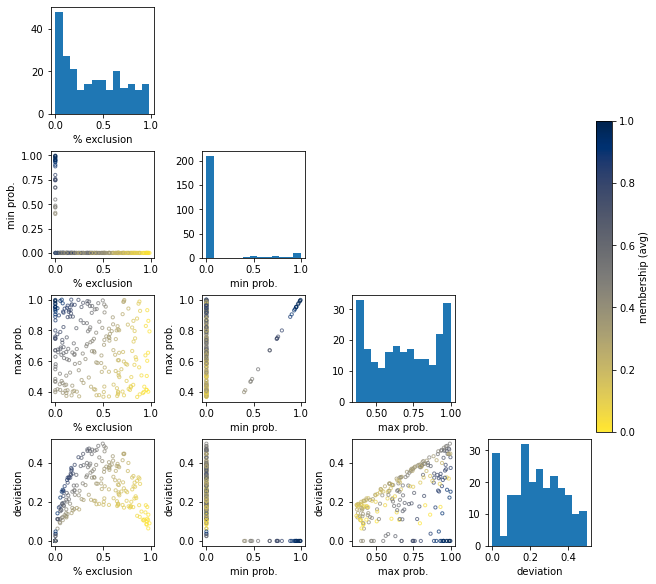

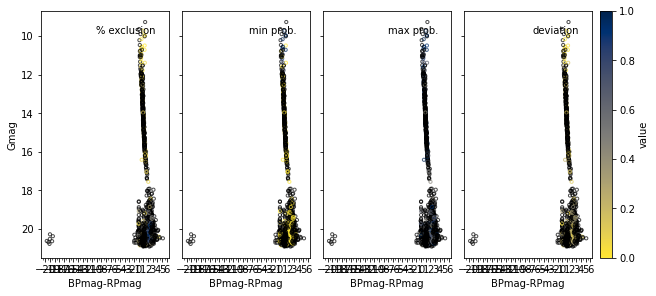

In [15]:
columns = ['excl','min','max','std']
labels = ['% exclusion', 'min prob.', 'max prob.', 'deviation']
plot_membership(table, columns, features+['aux'],
                labels=labels, color='avg', output='pert2d_ngc6242.pdf')

101


(<Figure size 700x300 with 4 Axes>,
 array([<Axes: xlabel='BPmag-RPmag', ylabel='Gmag'>,
        <Axes: xlabel='BPmag-RPmag'>, <Axes: xlabel='BPmag-RPmag'>],
       dtype=object))

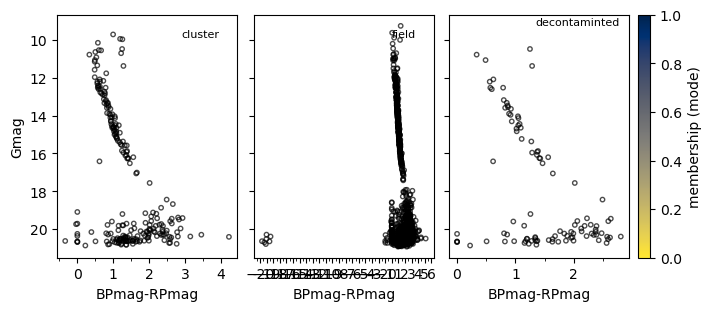

In [24]:
member = (table['excl'] <= 1) & (table['min'] < 0.3) & (table['std'] < 0.25)
print(np.sum(member))
plot_memb_cmd(table, ['Gmag','BPmag-RPmag'])